In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('HousePrices.csv')

In [3]:
df.isna().sum()/df.shape[0]

Id                     0.000000
Dwell_Type             0.000000
Zone_Class             0.000000
LotFrontage            0.154366
LotArea                0.000000
                         ...   
MoSold                 0.000000
YrSold                 0.000000
SaleType               0.000000
SaleCondition          0.000000
Property_Sale_Price    0.000000
Length: 81, dtype: float64

In [112]:
#conda install -c districtdatalabs yellowbrick
from yellowbrick.regressor import CooksDistance

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
visualizer = CooksDistance()
visualizer.fit(bos.iloc[:,:-1], bos.iloc[:,-1])
visualizer.show()

NameError: name 'bos' is not defined

In [30]:
4/506

0.007905138339920948

In [29]:
visualizer.influence_threshold_

0.007905138339920948

In [7]:
import pandas as pd
from sklearn.datasets import load_boston

#imports dataset
boston = load_boston()

#generates DataFrame bos
bos = pd.DataFrame(boston.data)

#adds columns names to bos
bos.columns = boston.feature_names 

#adds column 'PRICE' to bos
bos['PRICE'] = boston.target

In [14]:
from statsmodels.formula.api import ols

m = ols('PRICE ~ RM',bos).fit()
infl = m.get_influence()
sm_fr = infl.summary_frame()

In [15]:
sm_fr

,dfb_Intercept,dfb_RM,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.002374,-0.003272,0.000037,-0.177914,0.002314,-0.008569,-0.177743,-0.008561
1,0.001200,-0.002841,0.000111,-0.328930,0.002051,-0.014911,-0.328639,-0.014898
2,-0.031203,0.034392,0.000952,0.601919,0.005228,0.043636,0.601538,0.043608
3,-0.026514,0.029973,0.000885,0.662450,0.004018,0.042073,0.662081,0.042050
4,-0.043598,0.048255,0.001937,0.881528,0.004959,0.062234,0.881332,0.062220
...,...,...,...,...,...,...,...,...
501,0.006441,-0.008691,0.000234,-0.444828,0.002358,-0.021625,-0.444474,-0.021607
502,-0.001005,0.000685,0.000005,-0.065709,0.002085,-0.003004,-0.065644,-0.003001
503,0.028823,-0.032712,0.001087,-0.745948,0.003894,-0.046637,-0.745619,-0.046616
504,0.021249,-0.025271,0.000926,-0.782466,0.003017,-0.043044,-0.782165,-0.043027


In [17]:
(c,p) = m.dffits

AttributeError: 'OLSResults' object has no attribute 'dffits'

In [18]:
(c,p) = m.cooks_distance

AttributeError: 'OLSResults' object has no attribute 'cooks_distance'

In [22]:
sm = m.get_influence().summary_frame()

In [24]:
sm[['cooks_d','dffits']]

,cooks_d,dffits
0,0.000037,-0.008561
1,0.000111,-0.014898
2,0.000952,0.043608
3,0.000885,0.042050
4,0.001937,0.062220
...,...,...
501,0.000234,-0.021607
502,0.000005,-0.003001
503,0.001087,-0.046616
504,0.000926,-0.043027


In [31]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           2.49e-74
Time:                        12:41:58   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from pydatasets import data

ModuleNotFoundError: No module named 'pydatasets'

In [11]:
import pandas as pd
from sklearn.datasets import load_boston
bost = load_boston()
df = pd.DataFrame(data = bost.data, columns = bost.feature_names)
df['medv'] = bost.target

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
out = []
def outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr  = q3-q1
    infence = q1-(1.5*iqr)
    outfence = q3+(1.5*iqr)
    for i, j in enumerate(x):
        if (j<infence)|(j>outfence):
            out.append(i)
    return out            

In [18]:
df.drop(outlier(df['medv']),inplace=True, axis = 0)

In [19]:
df.shape

(466, 14)

In [20]:
from scipy.stats import anderson

In [21]:
anderson(df.medv)

AndersonResult(statistic=1.780274539020695, critical_values=array([0.571, 0.65 , 0.78 , 0.91 , 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [22]:
from scipy import stats

In [23]:
res_var, lambda_val = stats.boxcox(df['medv'])

In [24]:
lambda_val

0.7622647238592852

In [28]:
or_tr = pd.DataFrame()
or_tr['original'] = df.medv.values
or_tr['transformed'] = res_var

In [30]:
anderson(or_tr['transformed'])

AndersonResult(statistic=1.5105621443827317, critical_values=array([0.571, 0.65 , 0.78 , 0.91 , 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [31]:
from scipy.stats import kstest
from scipy.stats import shapiro

In [32]:
kstest(or_tr['transformed'], 'norm')

KstestResult(statistic=0.9998186120071522, pvalue=0.0)

In [34]:
shapiro(or_tr['transformed']), shapiro(or_tr['original'])

(ShapiroResult(statistic=0.9890287518501282, pvalue=0.0014550748746842146),
 ShapiroResult(statistic=0.9860989451408386, pvalue=0.00019688578322529793))

In [35]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)
from statsmodels.formula.api import ols

In [ ]:
train_data = pd.concat([x_train, y_train], axis = 1)
test_data = pd.concat([x_test, y_test], axis = 1)

In [41]:
lmodel = ols('medv~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=train_data).fit()

In [48]:
output = lmodel.summary()

In [57]:
output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     92.42
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.30e-98
Time:                        15:14:30   Log-Likelihood:                -818.54
No. Observations:                 326   AIC:                             1665.
Df Residuals:                     312   BIC:                             1718.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6908      4.157      9.548      0.000      31.512      47.870
CRIM          -0.1212      0.029     -4.236      0.000      -0.178      -0.065
ZN             0.0400      0.012      3.310      0.001       0.016       0.064
INDUS         -0.0531      0.049     -1.074      0.284      -0.150       0.044
CHAS           1.4695      0.747      1.967      0.050      -0.000       2.939
NOX          -11.0660      2.990     -3.701      0.000     -16.949      -5.183
RM             1.9061      0.379      5.026      0.000       1.160       2.652
AGE           -0.0250      0.011     -2.313      0.021      -0.046      -0.004
DIS           -1.2418      0.171     -7.257      0.000      -1.579      -0.905
RAD            0.2027      0.053      3.841      0.000       0.099       0.307
TAX           -0.0104      0.003     -3.394      0.001      -0.016      -0.004
PTRATIO       -0.6918      0.104     -6.664      0.000      -0.896      -0.488
B              0.0086      0.002      3.942      0.000       0.004       0.013
LSTAT         -0.4056      0.042     -9.668      0.000      -0.488      -0.323
==============================================================================
Omnibus:                       27.845   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.147
Skew:                           0.637   Prob(JB):                     1.42e-08
Kurtosis:                       4.018   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [60]:
het_breuschpagan(lmodel.resid, train_data.iloc[:,:-1])

(101.86010691617746,
 2.4040495224520963e-16,
 10.941728958132417,
 2.836555747311473e-19)

In [63]:
het_white(lmodel.resid, train_data.iloc[:,:-1])

AssertionError: 

In [64]:
het_goldfeldquandt(train_data.medv, train_data.iloc[:,:-1])

(1.1319824447552098, 0.22432884984862034, 'increasing')

In [68]:
num = (lmodel.resid - lmodel.resid.shift(1))**2

In [77]:
numer = num.sum()

In [73]:
denom = ((lmodel.resid)**2).sum()

In [78]:
numer/denom

1.8627694014288803

In [79]:
from statsmodels.stats.stattools import durbin_watson

In [80]:
durbin_watson(lmodel.resid)

1.8627694014288807

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
vif_value = []
for i in range(x_train.shape[1]):
    vif = variance_inflation_factor(x_train.values, i)
    vif_value.append(vif)

In [84]:
vif_value

[2.0983604005255,
 2.826209593019168,
 15.089142795189726,
 1.142713242279515,
 74.26873323879937,
 91.83385558844198,
 22.497329633741632,
 15.86689931980289,
 15.67896371203807,
 64.94725420798977,
 94.25807258335179,
 20.935910071349024,
 12.032354653672817]

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
sc_train_array = sc.transform(x_train)
pc = PCA().fit(sc_train_array)
pc_train_array = pc.transform(sc_train_array)
pc_train = pd.DataFrame(data=pc_train_array, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

In [89]:
for i in range(1, x_train.shape[1]):
    print("'PC%s'"%i, end =',')

'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',

In [96]:
#pc.explained_variance_ratio_.cumsum()

In [95]:
pc_train['transformed'] = or_tr['transformed']
sc_test_array = sc.transform(x_test)
pc_test_array = pc.transform(sc_test_array)
pc_test = pd.DataFrame(data=pc_test_array, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

In [97]:
tr_test_y = (y_test.values**lambda_val-1)/lambda_val

In [99]:
pc_test['tr_response'] = tr_test_y

In [103]:
lmodel_pc = ols('transformed~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10', data=pc_train).fit()

In [106]:
pred_train = lmodel_pc.predict(pc_train)
pred_test = lmodel_pc.predict(pc_test) 

In [107]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(pc_train['transformed'],pred_train)
test_mse = mean_squared_error(pc_test['tr_response'], pred_test)

In [109]:
import numpy as np
np.sqrt(train_mse), np.sqrt(test_mse)

(2.5329625084762233, 3.326756847989232)

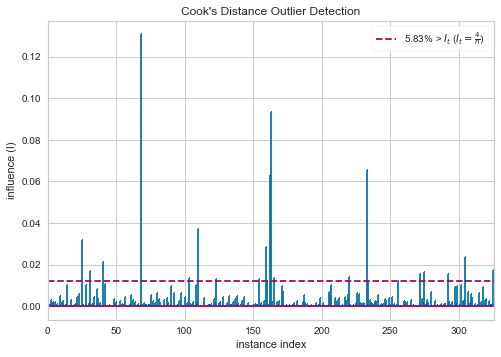

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [129]:
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance()
visualizer.fit(x_train, y_train)
visualizer.show()

In [128]:
x_train = x_train.reset_index(drop=True)
y_train = y_train .reset_index(drop=True)

In [115]:
4/326

0.012269938650306749

In [116]:
visualizer.influence_threshold_

0.012269938650306749

<Figure size 576x396 with 0 Axes>

In [118]:
cooksd = visualizer.distance_

In [130]:
out_cook = []
for i,j in enumerate(cooksd):
    if j > visualizer.influence_threshold_:
        out_cook.append(i)

In [131]:
out_cook

[25,
 31,
 40,
 68,
 103,
 110,
 123,
 154,
 159,
 162,
 163,
 165,
 220,
 233,
 272,
 275,
 292,
 305,
 325]

In [132]:
x_train_new = x_train.drop(index=out_cook, axis=0)

In [133]:
x_train_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,88.97620,0.0,18.10,0.0,0.6710,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
1,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
2,9.59571,0.0,18.10,0.0,0.6930,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31
3,0.10612,30.0,4.93,0.0,0.4280,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
4,0.27957,0.0,9.69,0.0,0.5850,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.03705,20.0,3.33,0.0,0.4429,6.968,37.2,5.2447,5.0,216.0,14.9,392.23,4.59
321,8.98296,0.0,18.10,1.0,0.7700,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60
322,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
323,0.14476,0.0,10.01,0.0,0.5470,5.731,65.2,2.7592,6.0,432.0,17.8,391.50,13.61


In [135]:
infl = lmodel.get_influence()

In [140]:
cook_diffit  = infl.summary_frame()
cook_diffit.columns

Index(['dfb_Intercept', 'dfb_CRIM', 'dfb_ZN', 'dfb_INDUS', 'dfb_CHAS',
       'dfb_NOX', 'dfb_RM', 'dfb_AGE', 'dfb_DIS', 'dfb_RAD', 'dfb_TAX',
       'dfb_PTRATIO', 'dfb_B', 'dfb_LSTAT', 'cooks_d', 'standard_resid',
       'hat_diag', 'dffits_internal', 'student_resid', 'dffits'],
      dtype='object')

In [142]:
cook_diffit[['cooks_d','dffits']]

,cooks_d,dffits
380,0.001469,0.143187
160,0.000879,-0.110790
402,0.003199,-0.212033
241,0.001502,-0.145013
494,0.001922,0.163997
...,...,...
356,0.000080,0.033467
208,0.002260,0.177725
119,0.000560,-0.088497
47,0.000761,-0.103103
